In [70]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [72]:
# http://etienned.github.io/posts/extract-text-from-word-docx-simply/

try:
    from xml.etree.cElementTree import XML
except ImportError:
    from xml.etree.ElementTree import XML
import zipfile
import os


"""
Module that extract text from MS XML Word document (.docx).
(Inspired by python-docx <https://github.com/mikemaccana/python-docx>)
"""

WORD_NAMESPACE = '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}'
PARA = WORD_NAMESPACE + 'p'
TEXT = WORD_NAMESPACE + 't'


def get_docx_text(path):
    """
    Take the path of a docx file as argument, return the text in unicode.
    """
    document = zipfile.ZipFile(path)
    xml_content = document.read('word/document.xml')
    document.close()
    tree = XML(xml_content)

    paragraphs = []
    for paragraph in tree.getiterator(PARA):
        texts = [node.text
                 for node in paragraph.getiterator(TEXT)
                 if node.text]
        if texts:
            paragraphs.append(''.join(texts))

    return '\n\n'.join(paragraphs)

def doc_to_txt(root_dir, outpath):
    ''' convert all pdfs in root_dir to text including sub dirs
    '''
    # First open the outpath
    with open(outpath, 'w') as outf:
        # Now walk the files
        for root, _, files in os.walk(root_dir):
            for f in files:
                _, ext = os.path.splitext(f)
                if ext == '.doc' or ext == '.docx':
                    json.dump({'name': f, 'content': get_docx_text(os.path.join(root, f))}, outf)
                    outf.write('\n')
                    
doc_to_txt('c:\\tools\\code\\ResumeAnalytics\\Other Resumes', 'other2.jsonl')

In [65]:
from pdftojsonl import process_pdfs

process_pdfs('c:\\tools\\code\\ResumeAnalytics\\Candidate Resumes', 'candidate.jsonl')
process_pdfs('c:\\tools\\code\\ResumeAnalytics\\Target Resumes', 'target.jsonl')
process_pdfs('c:\\tools\\code\\ResumeAnalytics\\Other Resumes', 'other.jsonl')

import json
with open('candidate.jsonl', 'r') as cf, open('target.jsonl', 'r') as tf, open('other.jsonl', 'r') as of:
  candidate = [json.loads(line) for line in cf]
  target = [json.loads(line) for line in tf]
  other = [json.loads(line) for line in of]
    
mashed_target = ''
doc_set = []
other_set = []
for t in target:
  doc_set.append(t['content'])
for o in other:
  other_set.append(o['content'])

can_set = []
for c in candidate:
  can_set.append(c['content'])


In [66]:

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# Do it again for other list
for i in other_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20)

In [67]:
print (ldamodel.print_topics(num_topics = 20, num_words = 4))

[(0, '0.017*manag + 0.017*project + 0.011*system + 0.011*client'), (1, '0.001*manag + 0.001*risk + 0.001*lead + 0.001*analysi'), (2, '0.016*requir + 0.014*manag + 0.014*test + 0.010*system'), (3, '0.001*develop + 0.001*use + 0.001*system + 0.001*vaibhaw'), (4, '0.001*data + 0.001*develop + 0.001*support + 0.001*project'), (5, '0.001*vaibhaw + 0.001*system + 0.001*use + 0.001*manag'), (6, '0.028*year + 0.017*c + 0.016*develop + 0.016*applic'), (7, '0.001*data + 0.001*system + 0.001*develop + 0.001*project'), (8, '0.001*branch + 0.001*locat + 0.001*kumar + 0.001*r'), (9, '0.029*test + 0.021*data + 0.015*perform + 0.015*develop'), (10, '0.027*manag + 0.027*risk + 0.019*lead + 0.016*develop'), (11, '0.025*develop + 0.024*system + 0.021*server + 0.016*microsoft'), (12, '0.001*system + 0.001*develop + 0.001*data + 0.001*test'), (13, '0.021*kumar + 0.020*vaibhaw + 0.016*r + 0.014*simul'), (14, '0.013*experi + 0.013*9 + 0.013*stanford + 0.011*va'), (15, '0.001*develop + 0.001*project + 0.001*u

In [68]:
import numpy

print (">>>>Target:<<<<\n")
target_topics = []
for i in target:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    print (i['name'])
    topics = ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    print (topics)
    for topic in topics:
        target_topics = numpy.append(target_topics, topic[0])
    target_topics = unique(target_topics)
    print (target_topics)
    
    
print ("\n\n>>>>Other:<<<<\n")
for i in other:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    print (i['name'])
    print (ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)))    
    
print ("\n\n>>>>Candidates:<<<<\n")

for i in candidate:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    i['distance'] = 0
    for topic in ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)):
        if (topic[0] in target_topics):
            i['distance'] = i['distance'] + topic[1]
    print (i['name'] + ": " + str(i['distance']))
    print (ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)))



>>>>Target:<<<<

Brandon Herzog Resume 2010.txt
[(14, 0.99666666665498471)]
[ 14.]
DrewChenResume.txt
[(11, 0.99654545452102572)]
[ 11.  14.]
Kyle Shaw Resume 2016.txt
[(0, 0.48864299250223142), (13, 0.51015057317081136)]
[  0.  11.  13.  14.]
ToddOldResume.txt
[(6, 0.99543269229057663)]
[  0.   6.  11.  13.  14.]


>>>>Other:<<<<

547820.txt
[(2, 0.99776470587316657)]
551854.txt
[(9, 0.99812252963431514)]
558202.txt
[(6, 0.99657039708054551)]
567324.txt
[(0, 0.42164590454117595), (10, 0.57577529887733903)]
570462.txt
[(9, 0.99811507934551014)]
570627.txt
[(0, 0.99861918604163014)]
579014.txt
[(19, 0.99797872339757632)]
Resume_ChristopherWAnderson_20150411.txt
[(10, 0.97849322005298556), (13, 0.020194826588789672)]
resume_vkumar_data_science.txt
[(13, 0.9730686021003), (18, 0.022374491684711947)]
Todd Powell.txt
[(11, 0.99845779220129816)]


>>>>Candidates:<<<<

Aberra Aimen 7494924 Resume.txt: 0.71382641244
[(0, 0.27669487979382085), (2, 0.044822650089078618), (6, 0.10677993658575517)

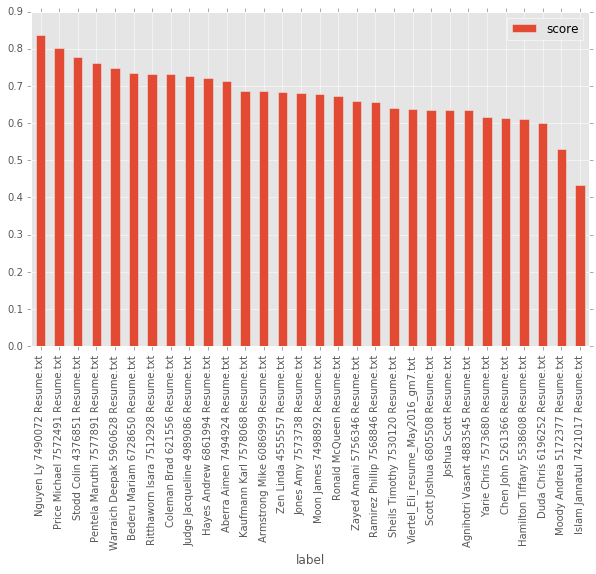

In [69]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

result = []
for i in range(len(candidate)):
    result.append((candidate[i]['name'], candidate[i]['distance']))
result = sorted(result, key=lambda x: x[1], reverse=True)

df = pd.DataFrame(result, columns=['label', 'score'])
df[:50].plot(kind='bar', x='label', y='score');